# Project Data Exploration Report
## Student Information
- Name: Your Abdul Rehman
- Student Number: 23113350
- GitHub Repository: https://github.com/AR-KASHMIRI47/REFERRAL-Statistics-and-Trends.git

## Imports and Load Data

In [61]:
import pandas as pd

# Loading the dataset
file_path = 'World Bank World Development Indicators\world_bank_development_indicators.csv'
data = pd.read_csv(file_path)

## Initial Exploration
### Displaying basic information about the dataset

In [43]:
print("Dataset Info:")
data_info = data.info()
data_info

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvab

In [44]:
print("First 5 rows:")
data.head()

First 5 rows:


,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [45]:
print("Dataset columns:")
data_columns = data.columns
data_columns

Dataset columns:


Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet%', 'logistic_performance_index',
       'military_expenditure%', 'GDP_current_US',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'reg

## Data Cleaning

In [71]:
# Data Cleaning
data.drop_duplicates(inplace=True)
data.columns = data.columns.str.strip().str.lower().str.replace('%', '_percent').str.replace(' ', '_')
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year

# Dropping columns with more than 50% missing values
missing_percent = data.isnull().mean() * 100
high_missing_cols = missing_percent[missing_percent > 50].index
data.drop(columns=high_missing_cols, inplace=True)

# Filling remaining missing values with median
for col in data.select_dtypes(include='float64').columns:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\Sharaz Haider\AppData\Local\Temp\ipykernel_12860\1099460335.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Sharaz Haider\AppData\Local\Temp\ipykernel_12860\1099460335.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

## Summary Statistics

In [74]:
def descriptive_statistics(df):
    """Displays descriptive statistics with skewness, kurtosis, and MAD."""
    numeric_df = df.select_dtypes(include='number')
    stats = numeric_df.describe()
    skewness = numeric_df.skew()
    kurtosis_values = numeric_df.kurtosis()
    mad = (numeric_df - numeric_df.median()).abs().mean()

    print("Descriptive Statistics:\n", stats)
    print("Skewness:\n", skewness)
    print("Kurtosis:\n", kurtosis_values)
    print("Median Absolute Deviation (MAD):\n", mad)

descriptive_statistics(data)

Descriptive Statistics:
        agricultural_land_percent     land_area  avg_precipitation  \
count               17272.000000  1.727200e+04       17272.000000   
mean                   37.023089  4.422826e+06        1170.743400   
std                    18.970355  1.317801e+07         621.518822   
min                     0.262821  2.027000e+00          18.100000   
25%                    24.041463  2.812000e+04         867.000000   
50%                    37.470745  2.419300e+05        1110.000000   
75%                    47.141348  1.030700e+06        1274.000000   
max                    93.440750  1.299507e+08        3240.000000   

       trade_in_services_percent  population_density  \
count               17272.000000        17272.000000   
mean                   17.472006          260.717373   
std                    17.383389         1393.675639   
min                     0.621025            0.098625   
25%                    12.640850           23.737179   
50%              

## Plots

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Plot 1: GDP Distribution Box Plot
def plot_gdp_distribution(df):
    """Plots the distribution of GDP values as a box plot."""
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['gdp_current_us'], showmeans=True)
    plt.title('Box Plot of GDP Distribution')
    plt.show()

# Plot 2: Life Expectancy Line Plot with Regression
def plot_life_expectancy(df):
    """Plots the average life expectancy over time with a regression line."""
    avg_life_expectancy = df.groupby('year')['life_expectancy_at_birth'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_life_expectancy.index, avg_life_expectancy.values, marker='o')

    # Adding a regression line
    X = avg_life_expectancy.index.values.reshape(-1, 1)
    y = avg_life_expectancy.values
    reg = LinearRegression().fit(X, y)
    plt.plot(X, reg.predict(X), color='red', linestyle='--', label='Trend Line')

    plt.title('Average Life Expectancy Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Life Expectancy')
    plt.legend()
    plt.show()

# Plot 3: Correlation Heatmap
def plot_correlation_heatmap(df):
    """Displays the correlation matrix as a heatmap."""
    plt.figure(figsize=(14, 12))
    numeric_df = df.select_dtypes(include='number')
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()


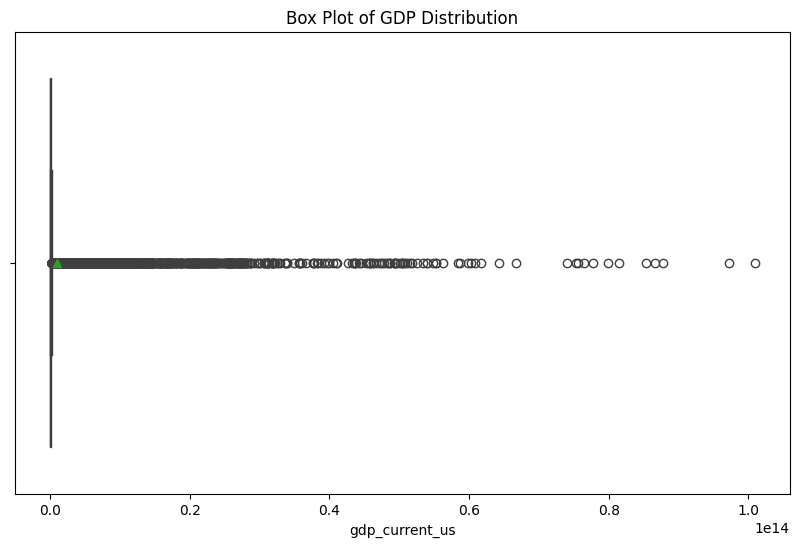

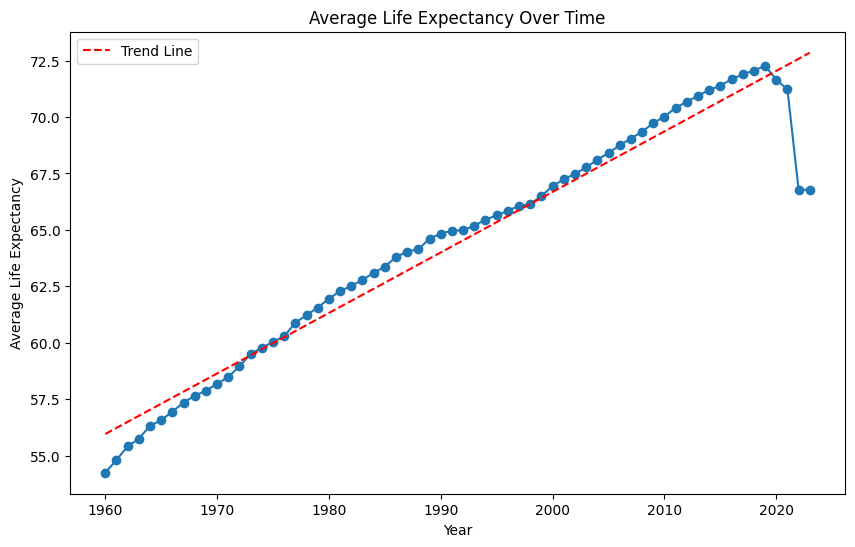

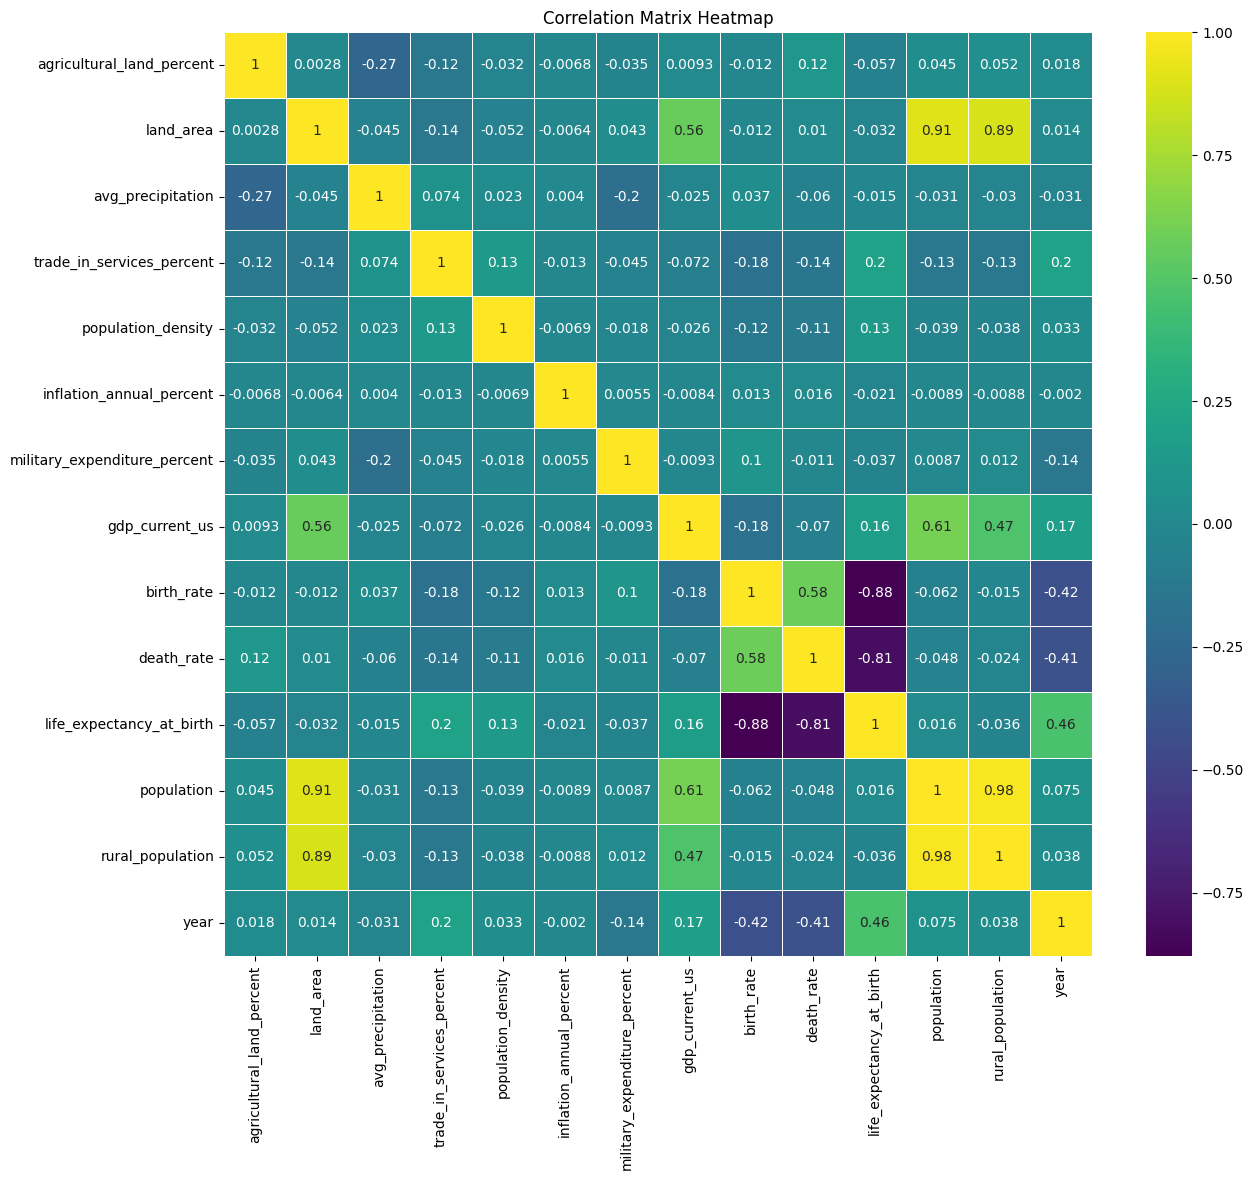

In [76]:
plot_gdp_distribution(data)
plot_life_expectancy(data)
plot_correlation_heatmap(data)

## Conclusion
This analysis provided insights into global development trends, showing a significant disparity in GDP distribution, a consistent improvement in life expectancy, and complex relationships between various economic indicators. Future studies could focus on identifying factors influencing GDP growth or investigating country-specific trends.